In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Class Environment**

In [ ]:
class Environment:
    def __init__(self, size, obstacles, start, goal ,strawberries):
        self.size = size
        self.grid = np.zeros(size)
        self.strawberries_grid = np.zeros(size)
        for x, y in obstacles:
            self.grid[x][y] = 1
        for x, y in strawberries:
            self.strawberries_grid[x][y] = 15
        self.start = start
        self.goal = goal

## **Class QLearning**

In [ ]:
class QLearning:
    def __init__(self, environment, alpha, gamma, epsilon):
        self.environment = environment
        self.Q = np.zeros((environment.size[0], environment.size[1], 4))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = ["H", "B", "G", "D"]

    def euclidean_distance(self, x1, y1, x2, y2):
      if x1 == x2 and y1 == y2:
        return 0
      return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

    def learn(self, num_iterations):
      for i in range(num_iterations):
        # Sélection aléatoire de l'état de départ
        x, y = self.environment.start

        # Boucle de déplacement du robot
        while (x, y) != self.environment.goal:
          # Choix d'une action selon une stratégie d'exploration
          if np.random.random() < self.epsilon:
            action = np.random.choice(self.actions)
          else:
            action = self.actions[np.argmax(self.Q[x][y])]

          # Effectuation de l'action
          x_new, y_new = x, y
          if action == "H":
            x_new = x - 1
          elif action == "B":
            x_new = x + 1
          elif action == "G":
            y_new = y - 1
          elif action == "D":
            y_new = y + 1

          # Vérifie si l'action n'amène pas le robot en dehors de l'environnement ou dans un obstacle
          if (x_new < 0 or x_new >= self.environment.grid.shape[0] or y_new < 0 or y_new >= self.environment.grid.shape[1] or self.environment.grid[x_new][y_new] == 1):
            reward = -10
            x_new = x
            y_new = y
          else:
            if reward < 0:
              reward = 0
            # Calcul de la récompense
            elif (x_new, y_new) == self.environment.goal:
              reward = 10
            elif self.environment.strawberries_grid[x_new][y_new] > 0:
              reward += self.environment.strawberries_grid[x_new][y_new]
              self.environment.strawberries_grid[x_new][y_new] = 0
            else:
              reward = 1 / self.euclidean_distance(x_new, y_new, self.environment.goal[0], self.environment.goal[1])

          # Mise à jour de la valeur Q
          self.Q[x][y][self.actions.index(action)] = self.Q[x][y][self.actions.index(action)] + self.alpha * (reward + self.gamma * np.max(self.Q[x_new][y_new]) - self.Q[x][y][self.actions.index(action)])

          # Mise à jour de la position du robot
          x = x_new
          y = y_new


    def choose_action(self, x, y):
      # Choose the action with the highest Q-value
      return self.actions[np.argmax(self.Q[x][y])]

    def choose_optimal_action(self, position):
      x, y = position
      optimal_action = self.actions[np.argmax(self.Q[x][y])]
      return optimal_action

    def visualize_q_values(self, position):
      x, y = position
      print("Q values at position ({}, {}):".format(x, y))
      for action in self.actions:
        print("{}: {}".format(action, self.Q[x][y][self.actions.index(action)]))

    def visualize_q(self):
      # Visualize the Q-values using a heatmap
      plt.imshow(np.max(self.Q, axis=2))
      plt.show()
    def visualize_q_final(self):
     # Print the final Q-values using a heatmap
      for i in range(10):
          for j in range(10):
              max_q = np.max(self.Q[i][j])
              action = self.actions[np.argmax(self.Q[i][j])]
              print("{:.2f} ({})".format(max_q, action), end=" ")
          print()
    def print_best_path(self,environment):
        x, y = environment.start
        path = []
        while (x, y) != environment.goal:
            action = self.choose_action(x, y)
            path.append((action, x, y))
            if action == "H":
                x -= 1
            elif action == "B":
                x += 1
            elif action == "G":
                y -= 1
            elif action == "D":
                y += 1
        path.append(("GOAL", x, y)) 
        for i, (action, x, y) in enumerate(path):
            if action == "GOAL":
                print(f"Step {i+1}: Goal reached at ({9}, {9})")
            else:
                print(f"Step {i+1}: Move {action} to ({x}, {y})")





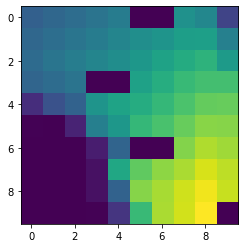



Optimal action at position (0, 0): D


Q values at position (0, 0):
H: -7.31786806616606
B: 2.957335322826736
G: -7.318208617489612
D: 2.9957227680505


3.00 (D) 3.26 (B) 3.49 (B) 3.75 (D) 4.09 (B) 0.00 (H) 0.00 (H) 4.95 (B) 4.52 (B) 2.01 (G) 
3.25 (D) 3.52 (D) 3.80 (D) 4.10 (D) 4.42 (B) 4.81 (B) 5.04 (D) 5.47 (B) 5.50 (B) 4.27 (G) 
3.43 (D) 3.78 (D) 4.12 (D) 4.42 (D) 4.78 (D) 5.18 (B) 5.62 (B) 5.99 (B) 6.31 (B) 5.30 (G) 
3.17 (H) 3.44 (H) 3.74 (H) 0.00 (H) 0.00 (H) 5.59 (B) 6.07 (B) 6.58 (B) 6.84 (B) 6.86 (B) 
1.27 (H) 2.45 (H) 3.05 (H) 5.03 (D) 5.66 (D) 6.06 (B) 6.52 (D) 7.01 (B) 7.47 (B) 7.49 (B) 
0.05 (H) 0.01 (H) 0.96 (D) 4.22 (D) 5.15 (H) 6.51 (D) 6.94 (D) 7.48 (D) 8.04 (B) 7.98 (B) 
0.00 (H) 0.00 (H) 0.01 (H) 0.77 (H) 3.14 (B) 0.00 (H) 0.00 (H) 7.95 (D) 8.61 (B) 8.39 (B) 
0.00 (H) 0.00 (H) 0.01 (H) 0.42 (D) 5.80 (D) 7.39 (B) 8.11 (D) 8.54 (D) 9.16 (B) 8.79 (B) 
0.00 (H) 0.00 (H) 0.00 (H) 0.46 (D) 3.06 (H) 8.00 (D) 8.50 (D) 9.04 (D) 9.56 (B) 8.94 (G) 
0.00 (H) 0.00 (H) 0.00 (H)

In [ ]:
# Create the environment with a size of 10x10, one obstacle at position (5, 5), a start position at (0, 0), and a goal position at (9, 9)
environment = Environment((10, 10), [(0, 5), (0, 6), (3, 3), (3, 4), (6, 5),(6, 6)], (0, 0), (9, 9),[(1, 3), (4, 5), (7, 8)])

# Create the Q-learning agent with a learning rate of 0.1, a discount factor of 0.9, and an exploration rate of 0.1
agent = QLearning(environment, alpha=0.1, gamma=0.9, epsilon=0.3)

#Train the agent for 1000 iterations
agent.learn(10000)

#Visualize the learned Q-values
agent.visualize_q()

print("\n")

#Choose the optimal action at position (0, 0)
optimal_action = agent.choose_optimal_action((0, 0))
print("Optimal action at position (0, 0): {}".format(optimal_action))

print("\n")

#View the Q-values at position (0, 0)
agent.visualize_q_values((0, 0))

print("\n")

# Affichage de la valeur Q maximale et de l'action associée pour chaque état
agent.visualize_q_final()

print("\n")

# Print the best path of the robot by choosing the action with the highest Q-value at each step
agent.print_best_path(environment)